In [2]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 97.2 MB/s eta 0:00:00


In [3]:
import fiona
import shapely.geometry
import numpy as np
import matplotlib.pyplot as plt

In [4]:
shp_path = "shark_contour.shp"
with fiona.open(shp_path, 'r') as shapefile:
    shape = shapely.geometry.shape(next(iter(shapefile))["geometry"])
    coords = np.array(shape.exterior.coords)

In [5]:
centered_coords = coords - coords.mean(axis=0)
scale = max(np.ptp(centered_coords[:, 0]), np.ptp(centered_coords[:, 1]))
normalized_coords = centered_coords / scale * 20

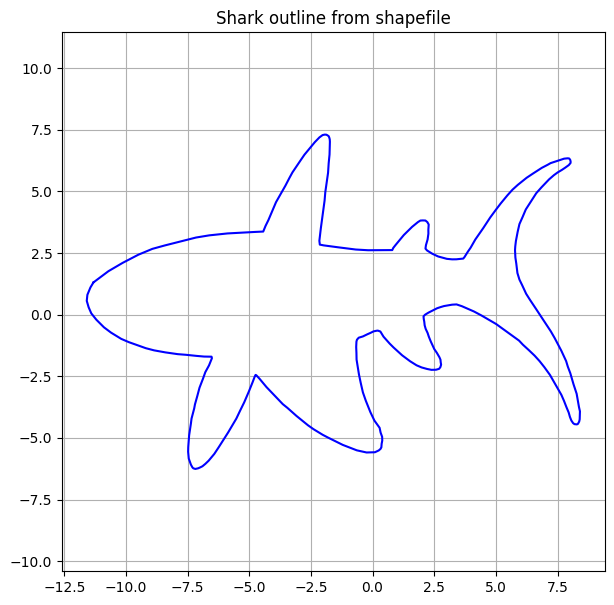

In [7]:
plt.figure(figsize=(7, 7))
plt.plot(normalized_coords[:, 0], -normalized_coords[:, 1], color='blue')
plt.title("Shark outline from shapefile")
plt.axis('equal')
plt.grid(True)
plt.show()

In [8]:
from Bezier import Bezier

def chunk_closed(points, chunk_size=6):
    total = len(points)
    segments = []
    for i in range(0, total, chunk_size):
        if i + chunk_size <= total:
            segments.append(points[i:i+chunk_size])
        else:
            remaining = points[i:]
            needed = chunk_size - len(remaining)
            segment = np.vstack([remaining, points[:needed]])
            segments.append(segment)
    return segments

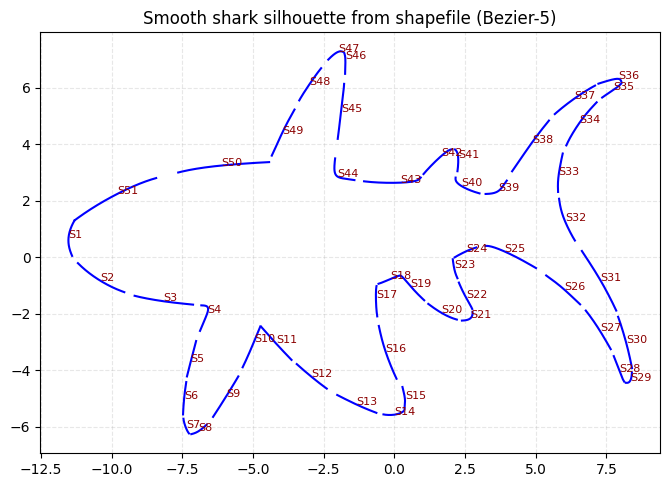

In [10]:
segments = chunk_closed(normalized_coords, 6)
t_vals = np.linspace(0, 1, 300)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_title("Smooth shark silhouette from shapefile (Bezier-5)")

for idx, seg in enumerate(segments):
    curve = Bezier.Curve(t_vals, seg)
    ax.plot(curve[:, 0], -curve[:, 1], color='blue')
    midpoint = Bezier.Point(0.5, seg)
    ax.text(midpoint[0], -midpoint[1], f"S{idx+1}", fontsize=8, color='darkred')

plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from Bezier import Bezier


coords = np.array([[-11.318255537627211, -1.306021111156711], [-11.441427208126054, -1.1007349936465962], [-11.564598878661025, -0.8030701231810571], [-11.590259643358822, -0.5567267821833712], [-11.513277349229302, -0.29498698225139186], [-11.405502137556365, -0.04864364132596585], [-11.20021602004625, 0.20796400557974254], [-10.892286843781076, 0.5158931819533042], [-10.604886279187431, 0.7314436053714417], [-10.194314044203331, 0.9829190992508791], [-9.886384867829769, 1.1163550756216147], [-9.55792707982081, 1.2343945932025762], [-9.193544221169905, 1.36269841669156], [-8.859954280206935, 1.4499450166207133], [-8.403192668708995, 1.5320594635958558], [-7.90024168084173, 1.6039096048074943], [-7.571783892832772, 1.6295703695052912], [-7.125286587098333, 1.6757597458746138], [-6.832753869695195, 1.7014205105724107], [-6.529956846384034, 1.7065526635264219], [-6.514560387558131, 1.7681384987577784], [-6.632599905139092, 2.060671216269306], [-6.781432340263471, 2.3326753220370486], [-6.878943246064518, 2.6046794278047907], [-7.017511375425395, 2.963930133357167], [-7.104757975426807, 3.2923879214022547], [-7.202268881155593, 3.641374321191128], [-7.233061798807402, 3.805603215285931], [-7.2895154811931375, 4.021153638631809], [-7.34083701058873, 4.216175450378421], [-7.366497775214268, 4.416329414934524], [-7.402422845820087, 4.647276297070176], [-7.438347916425906, 4.89361963828464], [-7.45374437525181, 5.109170061702778], [-7.474272986923336, 5.370909861417978], [-7.479405139841218, 5.5607995199938], [-7.464008681015314, 5.7147641083251], [-7.45374437525181, 5.837935778715552], [-7.402422845820087, 5.981636061138831], [-7.366497775214268, 6.084279119785498], [-7.304911940019041, 6.197186484484708], [-7.2689868694132205, 6.233111555018268], [-7.18687242243808, 6.258772319643805], [-7.073965057774999, 6.233111555018268], [-6.991850610727598, 6.197186484484708], [-6.899471857844432, 6.150997107898607], [-6.781432340263471, 6.05348620213369], [-6.647996363964995, 5.925182378861486], [-6.417049481720954, 5.648046120139732], [-6.237424128836376, 5.37604201429973], [-6.037270164280272, 5.0578485322349245], [-5.857644811395696, 4.7807122735131715], [-5.7036802233173045, 4.518972473797971], [-5.524054870432726, 4.216175450378421], [-5.370090282245945, 3.8928498152873443], [-5.205861388295662, 3.5592598742159853], [-5.015971729503061, 3.117894721543948], [-4.867139294378681, 2.7483797100112897], [-4.779892694341139, 2.517432827731118], [-4.743967623843709, 2.445582686591739], [-4.7131747061919, 2.4609791455260326], [-4.584870882739046, 2.5995472748507797], [-4.302602471171671, 2.93826936865937], [-4.07678774191777, 3.174348403821293], [-3.830444400883955, 3.436088203681013], [-3.640554742091355, 3.631110015427624], [-3.455797236361155, 3.7799424505158745], [-3.2505111188510405, 3.964699956282204], [-3.0862822247923667, 4.108400238560962], [-2.8194102720870258, 4.3239506619791], [-2.6192563074225323, 4.488179556146163], [-2.393441578132502, 4.647276297070176], [-2.0239265665637136, 4.873091026540855], [-1.818640449053599, 4.980866238213794], [-1.4645218963468445, 5.1553594380721], [-1.2079142495133959, 5.283663261488824], [-0.9205136849197495, 5.396570626043515], [-0.6382452732801145, 5.504345837788715], [-0.38676977936454726, 5.5607995199938], [-0.24306949708578898, 5.591592437717868], [-0.05831199124719999, 5.586460284836115], [0.09565259683119129, 5.581328131809845], [0.24961718498184232, 5.509477990814985], [0.3214673261934812, 5.447892155511369], [0.357392396690911, 5.381174167326001], [0.3676567025628037, 5.242606038001254], [0.39331746729673045, 5.109170061702778], [0.38818531434271913, 4.955205473371478], [0.3265994790391029, 4.785844426394922], [0.2855422555876617, 4.59082261479283], [0.07512398515966552, 4.298289897353563], [-0.08910490889900811, 3.9544356505187004], [-0.2738624147375971, 3.492541886030618], [-0.3919019322462988, 3.1538197921497675], [-0.47914853224771187, 2.7740404747090865], [-0.5509986733509611, 2.4301862278742243], [-0.6074523557005661, 2.0914641339211144], [-0.6485095791520072, 1.8245921811073833], [-0.6536417321060185, 1.5577202282936522], [-0.6639060379779114, 1.3165090403222377], [-0.6536417321060185, 1.0958264638778292], [-0.6331131203261031, 1.0188441698566983], [-0.561262979222854, 0.9367297228092968], [-0.3919019322462988, 0.8854081934137031], [-0.21227657943398087, 0.7981615934845497], [-0.07370845007310405, 0.7365757581809335], [0.03919891455384608, 0.6801220759035884], [0.16237058508881883, 0.6544613112057915], [0.21369211441215272, 0.6493291582517802], [0.3163351731672101, 0.6852542288575997], [0.4446389966200643, 0.8956724993217258], [0.69098233765388, 1.1728087579712196], [0.8500790787946721, 1.331905499039752], [1.055365196268657, 1.5217951578323525], [1.199065478583545, 1.650098981176817], [1.3427657607900436, 1.7578741929220154], [1.5223911136746213, 1.8913101692927512], [1.784130913534341, 2.055539063315295], [1.9894170310444559, 2.142785663244448], [2.2100996073804744, 2.2043714985480642], [2.3897249602650525, 2.2402965690816243], [2.574482465995252, 2.235164416127613], [2.697654136530225, 2.1992393455940533], [2.7489756658535587, 2.132521357480945], [2.7797685835053665, 2.0298782986174984], [2.764372124679462, 1.9374995457343336], [2.7541078187714394, 1.8297243340613947], [2.7130505953561284, 1.7322134282242188], [2.6052753835386704, 1.5474559225301494], [2.502632324783613, 1.3986234872973795], [2.3589320426132443, 1.0855621580420662], [2.281949748483724, 0.8956724993217258], [2.2306282191242603, 0.7417079111349447], [2.1536459251031297, 0.5774790171846609], [2.1125887015432987, 0.4337787348336428], [2.097192242717395, 0.290078452699404], [2.0766636309736093, 0.18230324088194572], [2.0663993250655865, 0.0693958762549956], [2.1331173133232144, 0.002677888069627776], [2.26655328965782, -0.07943655897777396], [2.4564429484142902, -0.1769474648149499], [2.6206718423645743, -0.2590619117900919], [2.759239971725451, -0.3052512881594145], [2.897808101086328, -0.34630851171924526], [3.2262658890952856, -0.4027621940688502], [3.4058912419798633, -0.4130264998323533], [3.6214416653980006, -0.34117635883749364], [4.114128347393372, -0.12562593534709654], [4.422057523730804, 0.03860295860318747], [5.0122551116356115, 0.38245720551030893], [5.371505817296377, 0.6441970052977688], [5.684567146515561, 0.8700117346961886], [5.941174793421268, 1.0547692403902582], [6.09513938153579, 1.2189981344850618], [6.341482722569606, 1.4448128636667021], [6.5724296047775175, 1.6654954401111106], [6.77258356944201, 1.8861780163387398], [6.967605381044103, 2.132521357480945], [7.193420110334133, 2.445582686591739], [7.388441921936225, 2.784304780544849], [7.532142204251113, 3.0357802745688063], [7.655313874749956, 3.251330697986943], [7.763089086459024, 3.4976740389123693], [7.860599992260071, 3.749149533008586], [7.952978745143236, 3.969832109236215], [8.004300274574959, 4.149457462120793], [8.060753956816175, 4.293157744327291], [8.132604098027812, 4.40093295621701], [8.189057780305157, 4.441990179560061], [8.286568686214594, 4.452254485395824], [8.327625909629905, 4.4317258738688174], [8.378947439061628, 4.339347120913393], [8.399476050841544, 4.246968367885709], [8.404608203795554, 4.072475168099662], [8.409740356641176, 3.9236427328668926], [8.368683133189736, 3.7388852271005635], [8.276304380306572, 3.2102734744271126], [8.148000556853717, 2.820229851078409], [8.019696733400863, 2.378864698406371], [7.917053674645805, 2.106860592783148], [7.850335686388178, 1.8861780163387398], [7.655313874749956, 1.4653414754104876], [7.388441921936225, 0.957258334625342], [7.229345180939952, 0.6801220759035884], [6.885490934068961, 0.15664247618414892], [6.634015440081134, -0.22313684125653224], [6.387672099047318, -0.592651852716931], [6.228575357942656, -0.8441273467408879], [6.064346463956242, -1.1982458994837721], [5.956571252247173, -1.4189284757114016], [5.874456805199771, -1.6858004285251325], [5.8282674287943195, -2.0707118989920845], [5.792342358188499, -2.311923087035759], [5.7769458993625955, -2.6147201103107904], [5.787210205270617, -2.7686846984975713], [5.812870969968414, -2.984235121987968], [5.884721111071665, -3.358882286402378], [5.956571252247173, -3.6719436155854317], [6.084875075736157, -3.959344180215208], [6.213178899080622, -4.262141203490239], [6.4287293225710185, -4.595731144561598], [6.639147593035145, -4.924188932606685], [6.84443371054526, -5.155135814814597], [7.157495039728313, -5.483593602859685], [7.352516851438795, -5.652954649836239], [7.506481439517186, -5.765862014463189], [7.67071033357586, -5.863372920300365], [7.809278462936736, -5.9557516731835305], [7.958110898097247, -6.0635268848564685], [8.029961039272756, -6.150773484785622], [8.030987469863557, -6.215096468235032], [8.012511719229117, -6.280788025901857], [7.971454495777675, -6.332109555297451], [7.90986866047406, -6.338268138770005], [7.768221239413036, -6.323898110571032], [7.220107305658861, -6.143246327167912], [7.101041357450968, -6.075501908391741], [6.8649623222890455, -5.952330237856769], [6.511870200173093, -5.724462647349005], [6.247051108577097, -5.5479165863090945], [5.89190612524341, -5.262568882933182], [5.676355701825272, -5.067547071331089], [5.469016723133553, -4.83762661971398], [5.1980390479566125, -4.509168831668893], [4.998911514027442, -4.2484554623277155], [4.771043923519677, -3.938473424844809], [4.483643358926031, -3.50121399460824], [4.165449876788966, -3.0434259524111065], [3.9765866487316877, -2.7129153032566737], [3.857520700559924, -2.540474964579972], [3.7281904464801374, -2.333135985815993], [3.6768689171568036, -2.2715501505123767], [3.397679797325705, -2.2428100941866926], [3.2272923197222174, -2.240757232932828], [3.0117418963402103, -2.2612858447488735], [2.6586497741881283, -2.3577703199229876], [2.422570739026205, -2.4686248234405928], [2.211126037971277, -2.600007938629724], [2.1454344803405814, -2.6759638020600525], [2.165963092120497, -2.8196640843388106], [2.231654649751192, -3.0454788136649706], [2.264500428512345, -3.2815578488268935], [2.2624475674030005, -3.4416810204139687], [2.2768175955297125, -3.653125721468897], [2.2213903438792997, -3.751663057896875], [2.1433816192312367, -3.815301754309836], [2.032527115713631, -3.8194074767453046], [1.9380955016127324, -3.813248893200491], [1.8395581652931436, -3.751663057896875], [1.6014262689134864, -3.5566412462947827], [1.2668098973235853, -3.2261305971403504], [1.0307308621977924, -2.9448886161276477], [0.9321935257698142, -2.8217169455926747], [0.8398147728866495, -2.7047038586025156], [0.7987575493629486, -2.61643082808256], [-0.1804572312636302, -2.610272244537746], [-0.6813553580215498, -2.6390123009356903], [-1.0734518424795982, -2.6882809691496794], [-1.4142267975059233, -2.731391053818855], [-1.8412219220512487, -2.7909240279408665], [-1.9828693431484026, -2.807346917249183], [-2.138886792444528, -2.838139834900992], [-2.157362542970579, -2.9941572843416364], [-2.0978295688846975, -3.4991611334266355], [-2.005450816037663, -4.190975349459568], [-1.9459178419156509, -4.622076196223583], [-1.9171777854815772, -4.960798290176693], [-1.8720148396307974, -5.268727466477995], [-1.804270420854627, -5.753202703891468], [-1.7796360867476326, -6.137087743623098], [-1.744737446768745, -6.492232726956785], [-1.7303674185336435, -6.9007521008676695], [-1.7303674185336435, -7.007500881949806], [-1.736526002078457, -7.106038218377785], [-1.7508960303135588, -7.163518331245932], [-1.7755303644205533, -7.231262750022101], [-1.833010477288701, -7.274372834763537], [-1.880226284393345, -7.296954307616668], [-1.9438649808063064, -7.299007168870531], [-2.0259794277814485, -7.280531418163831], [-2.1553096818612345, -7.186099804099062], [-2.340067187591434, -6.995183714932439], [-2.592569112206193, -6.691360260994346], [-2.762956589701291, -6.484021282158107], [-2.9189740389974164, -6.256153691794863], [-3.1098901282724296, -5.9687531272373455], [-3.247431827042504, -5.769625593272044], [-3.3664977752142677, -5.552022308672303], [-3.53483239160002, -5.227670242990424], [-3.7278013421288976, -4.884842426674105], [-3.9146117090768313, -4.560490360992226], [-4.07678774191777, -4.1786581824422], [-4.2225408853058735, -3.8358303661981408], [-4.339553972296033, -3.5976984698546137], [-4.4339855863608015, -3.3677780182375043], [-4.746020484953053, -3.353407989894013], [-5.879199853766412, -3.2918221546626563], [-6.62233559923107, -3.213813430050723], [-7.158132365967875, -3.125540399530768], [-7.650819047963248, -3.0003158677419304], [-8.430906294552265, -2.803241195030494], [-8.92975156020084, -2.6656994962965492], [-9.496341244589455, -2.4296204611346264], [-10.132728208863584, -2.099109811907934], [-10.711635060377958, -1.7603877179548242], [-11.318255537627211, -1.306021111156711]])

In [12]:
coords = coords - coords.mean(axis=0)


def chunk_closed(points, chunk_size=6):
    total = len(points)
    segments = []
    for i in range(0, total, chunk_size):
        if i + chunk_size <= total:
            segments.append(points[i:i+chunk_size])
        else:
            remaining = points[i:]
            needed = chunk_size - len(remaining)
            segment = np.vstack([remaining, points[:needed]])
            segments.append(segment)
    return segments

segments = chunk_closed(coords, 6)
t_vals = np.linspace(0, 1, 300)

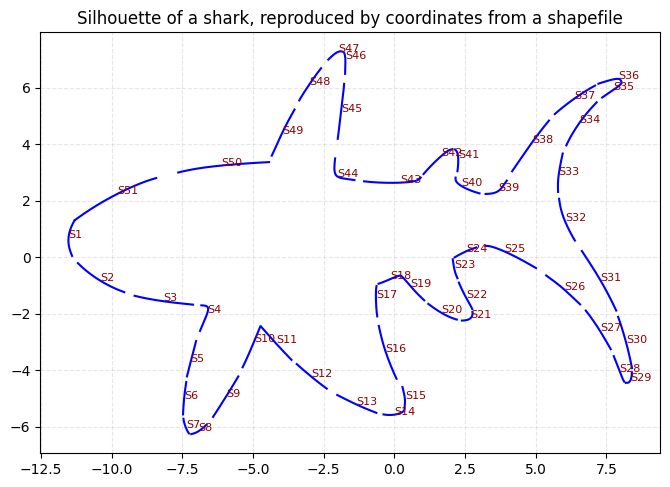

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_title("Silhouette of a shark, reproduced by coordinates from a shapefile")

for idx, seg in enumerate(segments):
    curve = Bezier.Curve(t_vals, seg)
    ax.plot(curve[:, 0], -curve[:, 1], color='blue')
    midpoint = Bezier.Point(0.5, seg)
    ax.text(midpoint[0], -midpoint[1], f"S{idx+1}", fontsize=8, color='darkred')

plt.show()